# Project Title

Code by **Caroline Juang**, c.juang@columbia.edu

## Setup

In [3]:
# import
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Import the data

In [4]:
# import fire data and get variables
burnarea_data = xr.open_dataset('data\\wildfire\\burnarea_combined.nc')
burnarea = burnarea_data.burnarea
time_str = burnarea_data.time
X = burnarea_data.X
Y = burnarea_data.Y
# remove burn area netCDF
burnarea_data = None

## Forested and Non-Forested area

How much do forests matter to burned area?

**Get burned area in forests and not in forests**

In [5]:
# import forested area
forest_type_data = xr.open_dataset('data\\US_ForestType_Ruefenacht\\forest_type_frac.nc')
ftype = forest_type_data.ftype

# storage
forest = np.zeros((len(Y), len(X)), np.single)

# add up the forest percentages for each forest type
for index,number in enumerate(ftype):
    forest = forest + forest_type_data.forest_type_frac[index,:,:]

# remove forest_type_data netCDF
forest_type_data = None

# get burned area in forest
burnforest = burnarea * forest

In [6]:
# get non-forested burned area using fractional difference
burnxforest = burnarea * (1-forest)

In [28]:
# get time-sum spatial burn area
burnforesttime = burnforest.sum(dim='time')
burnxforesttime = burnxforest.sum(dim='time')

**Get (coarse) total burned area**

In [7]:
# resample to get burned area by year
burnforest_y = burnforest.resample(indexer={'time':'Y'}).sum().sum(dim=['X','Y'])
burnxforest_y = burnxforest.resample(indexer={'time':'Y'}).sum().sum(dim=['X','Y'])

In [8]:
# setup
# max and min burned area
yrmin = time_str.time.values.min().astype('datetime64[Y]').astype(int)
yrmax = time_str.time.values.max().astype('datetime64[Y]').astype(int)

# make list of years
years = np.arange(yrmin, yrmax+1)
months = np.arange(1,12+1) # months
nyears = yrmax-yrmin

TypeError: _pcolorargs() got an unexpected keyword argument 'allmatch'

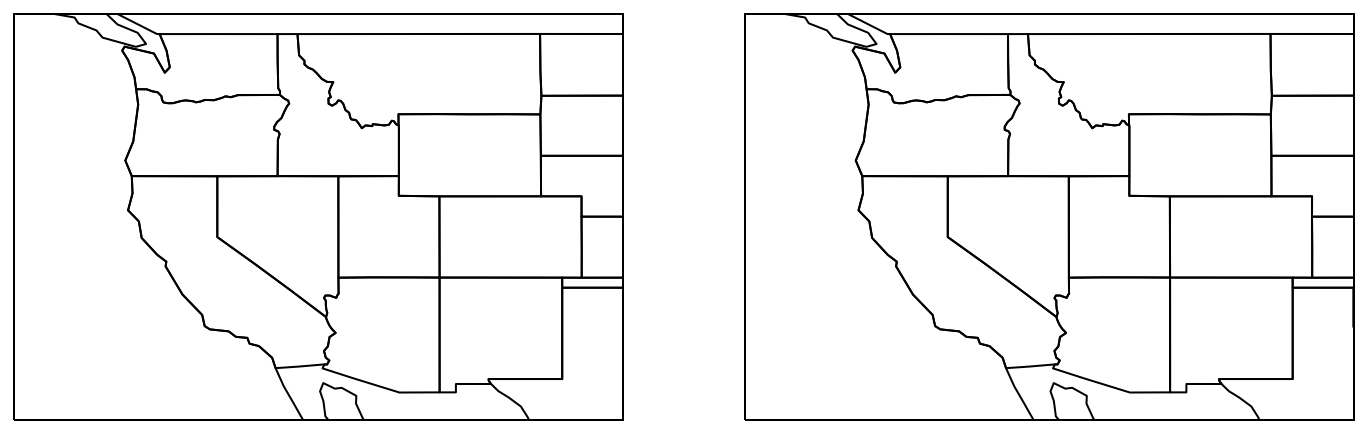

In [31]:
# visualize forested and non forested burned area

# define map extent
extent = [-130,-100,30,50]

# plot data
fig, ax = plt.subplots(1, 2, figsize=(12,8), subplot_kw={'projection': ccrs.PlateCarree()})
for i in range(0,2):
    ax[i].set_extent(extent, ccrs.PlateCarree())
    ax[i].add_feature(cfeature.COASTLINE, edgecolor='black', zorder=9)
    ax[i].add_feature(cfeature.STATES, edgecolor='black', zorder=10)

# plot data
ax[0].pcolormesh(burnforesttime.X, burnforesttime.Y, burnforesttime.values, cmap='Blues',
              transform=(ccrs.epsg(5070)))

In [ ]:
# plot data
fig, ax = plt.subplots()
ax.facecolor('whitesmoke')
ax.stackplot(years, [burnforest_y, burnxforest_y], labels=['Forest Burn Area', 'Non-forest Burn Area'])
ax.set_title('Forest and Non-Forest Burned Area')
ax.legend()
